
# Домашнее задание по EDA и предсказанию целевой переменной

Ниже представлен код для загрузки и вывода описания данных по диабету.



In [101]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [102]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Вам необходимо:  
1) Провести EDA данных.  
2) Выбрать и построить модель(ли) (из тех, которые прошли), прогнозирующую количественную меру прогрессирования заболевания за год (`target`).

    Пройденные модели:
    - Linear regression
    - Logistic Regression
    - KNN (k-Nearest Neighbors)
    - Decision Tree
    - Random Forest

3) Модель должна максимизировать метрику R^2, кроме метрики оцените график распределения остатков.
4) Сделать вывод, каких результатов удалось достичь.  

Во всех действиях, содердащих случайную составляющую, фиксируйте `random_state=42`.

*Сопровождайте все действия, которые могут предполагать альтернативные способы реализации, обоснованием*.

Количество баллов будет исчисляться исходя из объема и глубины проделанной работы, но не более 20 баллов.


### **1. EDA данных:**

1.1. **Общая информация о данных**:

In [3]:
# Начальная информация о данных
info = df.info()
description = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


   - Всего **442 записи** и **11 столбцов**;
   - Все признаки и целевая переменная представлены числовыми значениями типа `float64`;
   - Пропущенных значений в данных нет.

1.2 **Проверка нормальности распределений:**

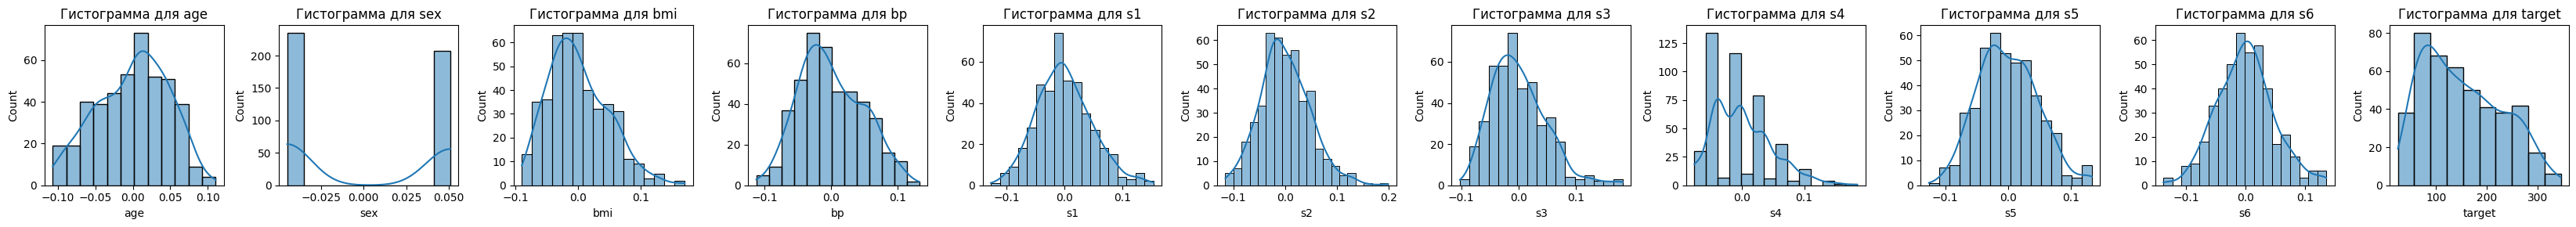

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Гистограммы для проверки нормальности распределения
fig, axes = plt.subplots(1, len(df.columns), figsize=(33, 3))

for i, col in enumerate(df.columns[:]):
    # Гистограмма с наложенной кривой нормального распределения
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма для {col}')

plt.tight_layout()
plt.show()

   - Соответствует нормальному распределению признак `s6`;
   - Остальные признаки распределены ненормально, включая целевую переменную;
   - Гистограмма распределения целевой переменной показывает, что данные слегка смещены вправо, что может потребовать трансформации при моделировании.

1.3. **Корреляция признаков с целевой переменной:**

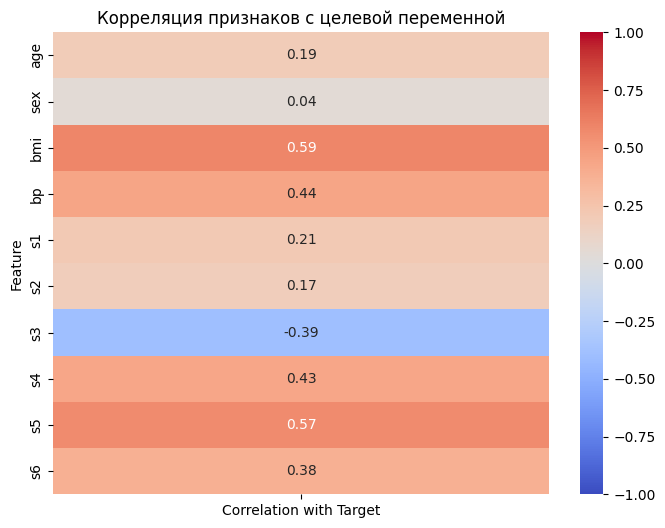

In [7]:
from scipy.stats import normaltest, pearsonr

# Проверка значимости корреляции каждого признака с целевой переменной
correlation_with_target = {col: pearsonr(df[col], df['target']) for col in df.columns[:-1]}

# Создаем датафрейм с корреляцией
correlation_data = pd.DataFrame({
    'Feature': [col for col in df.columns[:-1]],
    'Correlation with Target': [correlation_with_target[col][0] for col in df.columns[:-1]]
}).set_index('Feature')

# Тепловая карта
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Корреляция признаков с целевой переменной")
plt.show()

- Признаки с наибольшей корреляцией с целевой переменной: `bmi` (0.59), `s5` (0.57), `bp` (0.44) и `s4` (0.43):
- Слабая или почти отсутствующая корреляция наблюдается у признаков `sex` и `age`;
- Также обратная корреляция наблюдается у признака `s3` (-0.39), что может быть интересно для анализа.

1.4. **Анализ выбросов:**

<Figure size 1500x1000 with 0 Axes>

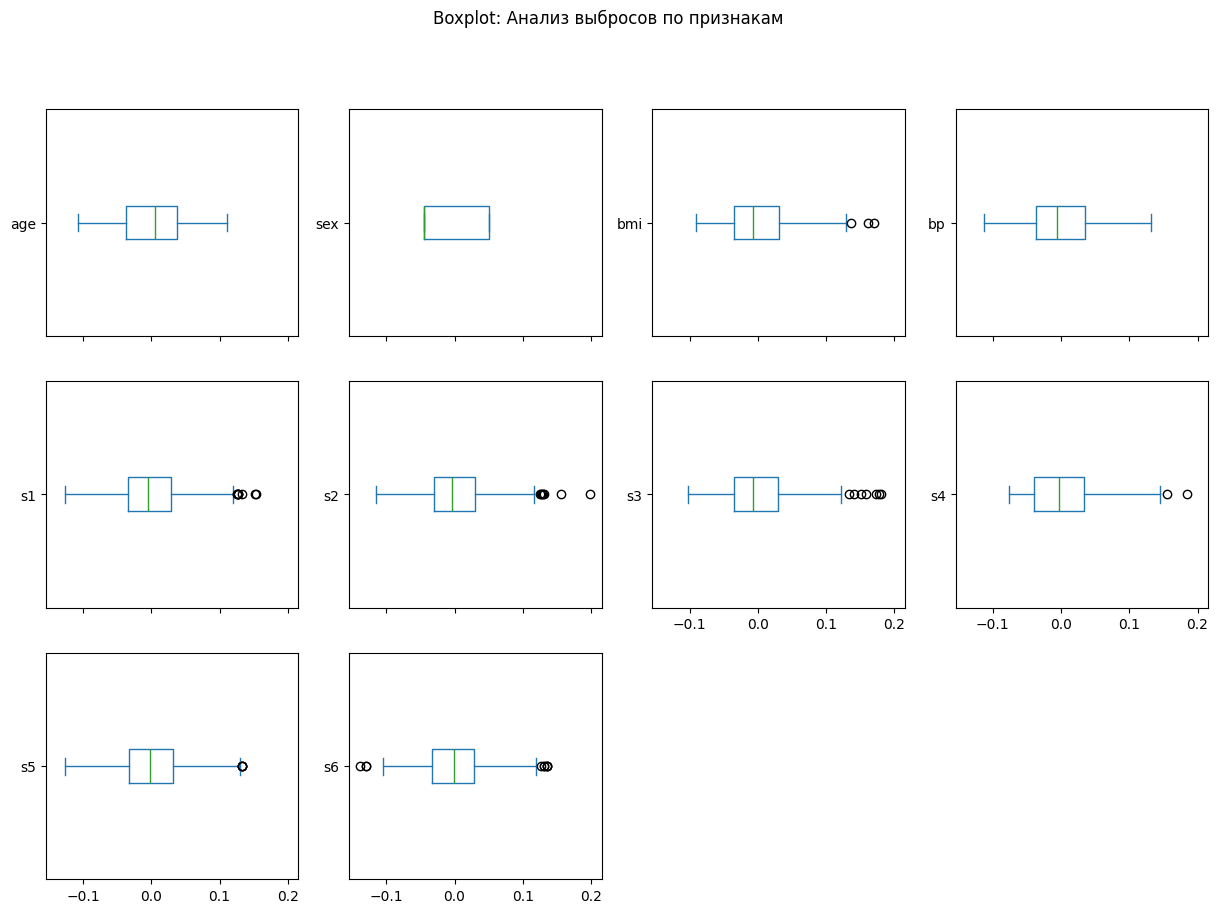

In [8]:
# Анализ выбросов для каждого признака
plt.figure(figsize=(15, 10))
df.drop(columns=['target']).plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 10), vert=False)
plt.suptitle('Boxplot: Анализ выбросов по признакам')
plt.show()

Некоторые признаки, такие как `bmi`, `s1`, `s2` и `bp`, имеют значительное количество выбросов. Выбросы могут быть важными характеристиками данных, но их можно учитывать при построении моделей, которые чувствительны к выбросам.

### **2. Выбор и построение моделей, прогнозирующую количественную меру прогрессирования заболевания за год (`target`).**

2.1. **Нормализация признаков:**

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 1. Очистка выбрасов
columns_with_outliers = ['s2', 's3', 's4', 's5']
data_cleaned = df.copy()
for col in columns_with_outliers:
    data_cleaned = remove_outliers(data_cleaned, col)

# 2. Преобразуем target с помощью логарифма, если данные правосторонне смещены
data_cleaned['target_log'] = np.log1p(data_cleaned['target'])

# 3. Нормализация признаков и целевой переменной с помощью StandardScaler
scaler = StandardScaler()
X = data_cleaned.drop(columns=['target', 'target_log'])  # Убираем оригинальный target
y = data_cleaned['target_log']  # Логарифмированная цель

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # Нормализуем целевую переменную

2.2. **Разделение выборки на обучающую и тестовую:**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

2.3. **Обучение моделей:**

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Linear Regression:\nMSE: {mse_linear:1.3f}, R2: {r2_linear:1.3f};\n')
print(f'Random Forest:\nMSE: {mse_rf:1.3f}, R2: {r2_rf:1.3f}')

Linear Regression:
MSE: 0.461, R2: 0.531;

Random Forest:
MSE: 0.548, R2: 0.442


### **3. Вывод**
Обе модели показали схожие результаты, с небольшим преимуществом линейной регрессии по R² и MSE. Однако значения R² (~0.53 и 0,44) показывают, что ни одна из моделей не объясняет большую часть дисперсии целевой переменной, что указывает на возможность улучшения модели, например, за счет более сложных алгоритмов или работы с признаками.